In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pow, exp, pi, e

# Exercise 1. (a)

In [2]:
def conditional(y, mu, sigma):
    return (1/sqrt(2*pi*pow(sigma,2))) * pow(e, pow(y-mu,2) / (-2*pow(sigma,2)) )

def marginal(y, mus, sigma):
    density = 0
    for mu in mus:
        density += conditional(y, mu, sigma)
    return density

In [3]:
min_y = np.amin(-6)
max_y = np.amax(7.5)
y_range = np.linspace(float(min_y), float(max_y), 30000)

In [4]:
mus = [1, 2]

cond1 = []
cond2 = []
marg = []

for y in y_range: 
    cond1.append(conditional(y, mus[0], 2))
    cond2.append(conditional(y, mus[1], 2))
    marg.append(marginal(y, mus, 2))

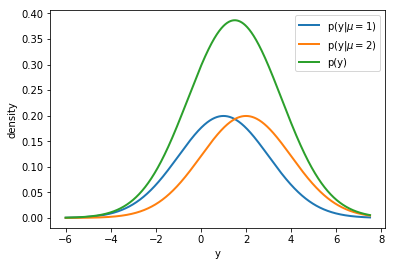

In [5]:
plt.plot(y_range, cond1, lw=2, label="p(y|$\mu=1$)")
plt.plot(y_range, cond2, lw=2, label="p(y|$\mu=2$)")
plt.plot(y_range, marg, lw=2, label="p(y)")

plt.xlabel('y')
plt.ylabel('density')
plt.legend()
plt.show()

# Exercise 1. (b)

In [6]:
def posterior(mu, sigma):
    return (0.5 * conditional(y=1, mu=mu, sigma=sigma)) / marginal(y=1, mus=mus, sigma=sigma)

posterior(mu=1, sigma=2)

0.26560468668687814

# Exercise 1. (c)

In [10]:
min_sigma = np.amin(0.5)
max_sigma = np.amax(3)
sigma_range = np.linspace(float(min_sigma), float(max_sigma), 5).tolist()

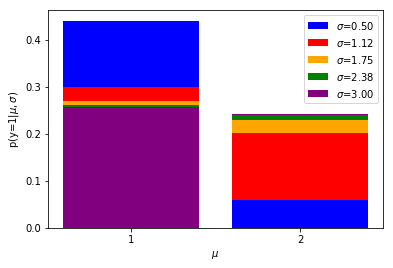

In [11]:
colors = ["blue", "red", "orange", "green", "purple"]

for i in range(len(sigma_range)):
    plt.bar(1, posterior(1, sigma_range[i]), label="$\sigma$={:.2f}".format(sigma_range[i]), color=colors[i])
    
sigma_range.reverse()
colors.reverse()

for i in range(len(sigma_range)):
    plt.bar(2, posterior(2, sigma_range[i]), color=colors[i])

plt.xlabel('$\mu$')
plt.ylabel('p(y=1|$\mu, \sigma$)')
plt.xticks(np.arange(1, 3))
plt.legend()
plt.show()

# Exercise 2.

In [12]:
import scipy.integrate as integrate
import torch
from torch.distributions.normal import Normal
from torch.distributions.multivariate_normal import MultivariateNormal

In [20]:
#assume normally distributed marginal p(v)
#with zero mean and unit variance
def p(v):
    return Normal(0, 1).log_prob(v).exp().item()

#assume 2D discrete u
def integrate_u(us, v):
    integral = 0
    for u in us:
        integral += MultivariateNormal(torch.Tensor([v]*2), torch.eye(2)).log_prob(u).exp()
    return integral.item()

us = torch.empty([3, 2])
for i in range(3):
    us[i] = torch.Tensor([i, i])
    
def E(us):
    return integrate.quad(lambda v: integrate_u(us, v)*p(v), float("-inf"), float("inf"))[0]

print("E(u) = {:.2f}".format(E(us)))
print("var(u) = {:.2f}".format(E(us.pow(2)) - pow(E(us),2)))

E(u) = 0.18
var(u) = 0.13
